In [1]:
#This notebook's owner is a github user with the name yuki678. I merely modified a few scripts to make it compatible so it can be run uninterrupted and smoothly.
# Many of the scripts used to run this notebook are copyrighted by the Tensorflow authors and licensed under the Apache License, Version 2.0 (the "License").
# A copy of the license can be obtained at 
# http://www.apache.org/licenses/LICENSE-2.0

In [2]:
# Read the README document first before running this notebook. It specifies what changes to make so all cells can be run be at once.
# Make all the specified changes in the README before running any cells, then run until cell 12, make the specified changes and save them.
# Before running the notebook the second time, make sure to comment out the line !rm -rf {repo_dir_path} in cell 11.
# After these changes are made then you can run the entire notebook through the terminal command: 
# nohup jupyter nbconvert --to notebook --execute (notebookname).ipynb > (notebookname)_stdout.txt 2> (notebookname)_stderr.txt &
# For this specific notebook the command would be :
# nohup jupyter nbconvert --to notebook --execute TF_exF.ipynb > TF_exF_stdout.txt 2> TF_exF_stderr.txt &
#This notebook is used for transfer learning. The pretrained models that can be selected are already trained on the coco dataset.
# The data is already pre-labeled. Since this is transfer learning 100 "samples" per label is sufficient.
# If you want to use your own data then you can use LabelImg to label the images and store the bounding box coordinates. The xml files 
# created by LabelImg are in Pascal VOC format. Go to driving-object-detection/images, delete the imported images and xml files and upload your own.
# Also go to driving-object-detection/annotations and change the label_map.pbtxt file to match the structure of your object detection dataset.
# In that text file create as many items as you need and assign them the corresponding name.
# This entire notebook can be run interrupted through the terminal command: 



In [3]:
cd ./

/home/faizan_samad/testing


In [4]:
# %tensorflow_version
#First install the required packages
# These are linux commands so change the terminal commands based on your OS. 

!pip install -q pillow lxml jupyter matplotlib cython pandas contextlib2
!sudo apt-get install -qq protobuf-compiler
!pip install -q pycocotools tf_slim

In [5]:
#Ensure that you are in the correct directory first before cloning the driving object detection github repository
#This cell creates the repository directory that already has the code for the models and the pipeline configuration files
#Also additional subdirectories and file paths are created, they will be of use later.
#THe original repo_url is repo_url = 'https://github.com/yuki678/driving-object-detection'
#However I already cloned that repoistory into my own, although this is not necessary.
#Change the directory to fit your workspace.
%cd ./
import os

# Repo URL
repo_url = 'https://github.com/Thearkhamknight/driving-object-detection'
# repo_url = 'https://github.com/yuki678/driving-object-detection'
# Models
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'model_path': '/models/tf2/my_ssd_mobilenet_v2/',
        'pipeline_file': 'pipeline.config'
    },
    'ssd_mobilenet_v2_fpn': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'model_path': '/models/tf2/my_ssd_mobilenet_v2_fpnlite/',
        'pipeline_file': 'pipeline.config'
    },
    'my_centernet_resnet50_v1_fpn': {
        'model_name': 'centernet_resnet50_v1_fpn_512x512_coco17_tpu-8',
        'model_path': '/models/tf2/my_centernet_resnet50_v1_fpn/',
        'pipeline_file': 'pipeline.config'
    },
    'my_centernet_resnet101_v1_fpn': {
        'model_name': 'centernet_resnet101_v1_fpn_512x512_coco17_tpu-8',
        'model_path': '/models/tf2/my_centernet_resnet101_v1_fpn/',
        'pipeline_file': 'pipeline.config'
    }
}

# Select a model to use.
selected_model = 'my_centernet_resnet50_v1_fpn'

model_name = MODELS_CONFIG[selected_model]['model_name']
model_path = MODELS_CONFIG[selected_model]['model_path']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Set Repository Home Directory
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

# Set Label Map (.pbtxt) path and pipeline.config path
label_map_pbtxt_fname = repo_dir_path + '/annotations/label_map.pbtxt'
pipeline_fname = repo_dir_path + model_path + pipeline_file
# pipeline_fname ='/home/faizan_samad/testing/Ex_Scripts/pipeline.config'
# Set .record path
test_record_fname = repo_dir_path + '/annotations/test.record'
train_record_fname = repo_dir_path + '/annotations/train.record'

# Set output directories and clean up
model_dir = repo_dir_path + '/training/'
output_dir = repo_dir_path + '/exported-models/'

!rm -rf {model_dir} {output_dir}
os.makedirs(model_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

/home/faizan_samad/testing


In [6]:
# Clone Tensorflow model repo
#Again always ensure you are in the right directory before cloning or importing.
# This cell clones the tensorflow models repository
#Change the directory to fit your workspace.
%cd ./

# %cd /content
!git clone --quiet https://github.com/tensorflow/models.git

/home/faizan_samad/testing


In [7]:

# Compile protocol buffers
#Change the directory to fit your workspace.
%cd ./models/research
!protoc object_detection/protos/*.proto --python_out=.

/home/faizan_samad/testing/models/research


In [8]:
# Set environment variables
import os
os.environ['PATH'] += ':/testing/models:/testing/models/research/:/testing/models/research/slim/'

In [9]:
# Install libraries
# Do not worry if this does not work. It is not necessary to run the rest of the cells.
!pip install .
# Test
!python object_detection/builders/model_builder_test.py

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
Traceback (most recent call last):
  File "object_detection/builders/model_builder_test.py", line 20, in <module>
    from object_detection.builders import model_builder
ModuleNotFoundError: No module named 'object_detection'


In [10]:
%cd -

/home/faizan_samad/testing


In [11]:
# Coco Installation (Optional, required when using Coco Evaluation)
#Change the directory to fit your workspace and the script path after !cp.
%cd ./
!git clone --quiet https://github.com/cocodataset/cocoapi.git


/home/faizan_samad/testing


In [12]:
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools %cd ./models/research/

/home/faizan_samad/testing/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/faizan_samad/testing/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In fu

In [13]:
%cd -

/home/faizan_samad/testing


In [14]:
#If the model that was selected for some reason does not exist, this cell will download it from the tensorflow repository.
#It also sets the file path for the checkpoints, which needs to be established before the model can be trained.
#THe DEST_DIR is the path where the pretrained model is so under models/research/pretrained_model
#Everything that precedes that file path is dependent on how you set up your directories.
#Change the directory to fit your workspace. /models/research will be the same but anything preceding that will depend on the individual workspace.
%cd ./models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = model_name + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'
DEST_DIR = '/home/faizan_samad/testing/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()



os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(model_name, DEST_DIR)

# Check downloaded files
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

# Set fine tune checkpoint
fine_tune_checkpoint = os.path.join(DEST_DIR, "checkpoint/ckpt-0")
print("fine_tune_checkpoint: ", fine_tune_checkpoint)

/home/faizan_samad/testing/models/research
/home/faizan_samad/testing/models/research/pretrained_model
total 20K
drwxr-x---  4 faizan_samad faizan_samad 4.0K Jul 11  2020 .
drwxr-xr-x 23 faizan_samad faizan_samad 4.0K Mar 31 22:43 ..
drwxr-x---  2 faizan_samad faizan_samad 4.0K Jul 10  2020 checkpoint
-rw-r-----  1 faizan_samad faizan_samad 2.8K Jul 11  2020 pipeline.config
drwxr-x---  3 faizan_samad faizan_samad 4.0K Jul 10  2020 saved_model
fine_tune_checkpoint:  /home/faizan_samad/testing/models/research/pretrained_model/checkpoint/ckpt-0


In [15]:
%cd -

/home/faizan_samad/testing


In [16]:
%cd ./

/home/faizan_samad/testing


In [17]:
#This cell clones all the content from the original driving object detection repository into the repository directory path.
#It also checks that the label map and pipeline files exist.
#Add the code: os.makedirs(model_dir, exist_ok=True). after cloning  and pulling the repositories. 
#This ensures that a training sub folder will be created.
# The original clone command is !git clone {repo_url}
#Since the repository is public you will not be prompted to give your github username and password.
#But if you are prompted here is what you should do.

#Instead of !git clone {repo_url} type the command:
# !git clone https://<Username>:<Password>@github.com/yuki678/driving-object-detection.git
#Change the directory to fit your workspace.
import os
%cd ./
# Clean up
# The second time you run this remove !rm -rf {repo_dir_path} or comment it out.
!rm -rf {repo_dir_path}

# Clone

!git clone https://github.com/Thearkhamknight/driving-object-detection.git
!git clone https://github.com/Thearkhamknight/Ex_Scripts.git
# !git clone {repo_url} 
# Pull (just in case the repo already exists)
%cd {repo_dir_path}
!git pull

# Check if label map and pipeline files exist
assert os.path.isfile(label_map_pbtxt_fname), '`{}` not exist'.format(label_map_pbtxt_fname)
assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)
os.makedirs(model_dir, exist_ok=True)

/home/faizan_samad/testing
Cloning into 'driving-object-detection'...
remote: Enumerating objects: 1352, done.
remote: Counting objects: 100% (1352/1352), done.
remote: Compressing objects: 100% (933/933), done.
remote: Total 1352 (delta 350), reused 1352 (delta 350), pack-reused 0
Receiving objects: 100% (1352/1352), 218.59 MiB | 61.09 MiB/s, done.
Resolving deltas: 100% (350/350), done.
Cloning into 'Ex_Scripts'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.
/home/faizan_samad/testing/driving-object-detection
Already up to date.


In [20]:
# Check pipeline config - update if required
# Make sure that the pipeline is configured as needed. This cell checks that. If not you can manually go into the pipeline file and change it.
#The fine tune checkpoint type should be "detection"
# Ensure that the specified paths are completely correct with no typos.
#For example specify the path to annotations with driving-object-detection/annotations, and any preceding directories.
#Specify the checkpoint path as "models/research/pretrained_model/checkpoint/ckpt-0", and any preceding directories.


print(pipeline_fname)
!cat {pipeline_fname}


/home/faizan_samad/testing/driving-object-detection/models/tf2/my_centernet_resnet50_v1_fpn/pipeline.config
# CenterNet meta-architecture from the "Objects as Points" [1] paper
# with the ResNet-v2-101 backbone. The ResNet backbone has a few differences
# as compared to the one mentioned in the paper, hence the performance is
# slightly worse. This config is TPU comptatible.
# [1]: https://arxiv.org/abs/1904.07850
#

model {
  center_net {
    num_classes: 3
    feature_extractor {
      type: "resnet_v1_50_fpn"
    }
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 512
        max_dimension: 512
        pad_to_max_dimension: true
      }
    }
    object_detection_task {
      task_loss_weight: 1.0
      offset_loss_weight: 1.0
      scale_loss_weight: 0.1
      localization_loss {
        l1_localization_loss {
        }
      }
    }
    object_center_params {
      object_center_loss_weight: 1.0
      min_box_overlap_iou: 0.7
      max_box_predictions: 1

In [21]:
%cd {repo_dir_path}
#This cell partitions the images into a train and test set.
#The xml files were manually created using the LabelImg software.

# Split images to train:test = 9:1
!python scripts/partition_dataset.py -x -i images/ -r 0.1

# Check test images
!ls images/test

/home/faizan_samad/testing/driving-object-detection
 green_124.png			      red_391.jpg   red_817.png
 green_124.xml			      red_391.xml   red_817.xml
 green_131.png			      red_442.png   yellow_882.jpg
 green_131.xml			      red_442.xml   yellow_882.xml
 green_141.png			      red_475.jpg   yellow_923.png
 green_141.xml			      red_475.xml   yellow_923.xml
 green_171.png			      red_529.jpg   yellow_925.png
 green_171.xml			      red_529.xml   yellow_925.xml
 green_289.png			      red_550.png   yellow_947.png
 green_289.xml			      red_550.xml   yellow_947.xml
 green_5.png			      red_615.jpg   yellow_961.png
 green_5.xml			      red_615.xml   yellow_961.xml
 green_7.jpg			      red_644.png   yellow_962.png
 green_7.xml			      red_644.xml   yellow_962.xml
'image_2020-09-01 12:52:20.106.jpg'   red_706.png   yellow_969.png
'image_2020-09-01 12:52:20.106.xml'   red_706.xml   yellow_969.xml
'image_2020-09-01 12:54:42.431.jpg'   red_765.png   yellow_976.png
'image_2020-09-01 12:54:42.431.xm

In [22]:
#This cell creates the train and test data from the xml files and converts it into a train and test csv file respectively.
# Create train data:
!python scripts/xml_to_csv.py -i images/train -o annotations/train_labels.csv

# Create test data:
!python scripts/xml_to_csv.py -i images/test -o annotations/test_labels.csv

Successfully converted xml to csv.
Successfully converted xml to csv.


In [23]:
%cd -

/home/faizan_samad/testing


In [24]:
#This cell converts the train labeled csv into a tf.record format for training. Make sure the parameters are specified correctly.
#These scripts use functions defined in the object detection folder. Make sure the object detection folder (in models/research/object_detection)
# path is correctly specified in order to use it. 
# I already added the lines:
#import sys
#sys.path.insert(1,"/home/faizan_samad/testing/models/research")
# However change the file path to suit whatever preceding directories you might have
# Change the script paths to fit your workspace. /Ex_Scripts/generate_tfrecord_v1.py will be the same but anything preceding that will depend on your setup.

!python Ex_Scripts/generate_tfrecord_v1.py --csv_input=driving-object-detection/annotations/train_labels.csv --output_path=driving-object-detection/annotations/train.record --img_path=driving-object-detection/images/train --label_map driving-object-detection/annotations/label_map.pbtxt
!python Ex_Scripts/generate_tfrecord_v1.py --csv_input=driving-object-detection/annotations/test_labels.csv --output_path=driving-object-detection/annotations/test.record --img_path=driving-object-detection/images/test --label_map driving-object-detection/annotations/label_map.pbtxt
assert os.path.isfile(test_record_fname), '`{}` not exist'.format(test_record_fname)
assert os.path.isfile(train_record_fname), '`{}` not exist'.format(train_record_fname)

2022-03-31 22:44:27.935357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 22:44:27.935398: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/faizan_samad/testing/models/research
2022-03-31 22:44:29.496143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-31 22:44:29.496188: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 22:44:29.496210: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (production-instance-static-ip): /proc/driver/nvidia/version does not exist
Succ

In [25]:
# Set log directory for tensorboard to watch
LOG_DIR = model_dir

# Clean up the directory
!rm -rf {LOG_DIR}/*

In [26]:
# Use magic command to launch tensorboard within the notebook
%load_ext tensorboard
%tensorboard --logdir {LOG_DIR}

In [27]:
# Make sure to have the latest project repo downloaded
%cd {repo_dir_path}
!git pull

/home/faizan_samad/testing/driving-object-detection
Already up to date.


In [28]:
%cd -

/home/faizan_samad/testing


In [29]:
#TRAINING 
#This cell trains the model. Again make sure the object detection folder path is specified within these scripts otherwise it will not work.
# I already added the lines:
#import sys
#sys.path.insert(1,"/home/faizan_samad/testing/models/research")
# However change the file path to whatever preceding directories you might have.
# Also change the script file path for your workspace. /Ex_Scripts/model_main_tf2.py will remain the same but whatever precedes that will have to change.
#Change the directory to fit your workspace.

!python Ex_Scripts/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr

/home/faizan_samad/testing/models/research
2022-03-31 22:44:37.367528: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 22:44:37.367573: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-31 22:44:40.925047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:
2022-03-31 22:44:40.925104: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 22:44:40.925126: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (produ

In [30]:
# Check the generated files
# The line underneath !ls -lrt {model_dir} is unnecessary and can be commented out.
!ls -lrt {model_dir}
#content_test/models/research/object_detection/model_main_tf2.py

total 98956
drwxr-xr-x 2 faizan_samad faizan_samad      4096 Mar 31 22:44 train
-rw-r--r-- 1 faizan_samad faizan_samad 101296932 Mar 31 22:45 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 faizan_samad faizan_samad     23567 Mar 31 22:45 ckpt-1.index
-rw-r--r-- 1 faizan_samad faizan_samad       166 Mar 31 22:45 checkpoint


In [31]:
%cd ./

/home/faizan_samad/testing


In [32]:
#This cell evaluates the models performance on the test set
#Change the directory to fit your workspace.
# Also change the script file path for your workspace. /Ex_Scripts/model_main_tf2.py will remain the same but whatever precedes that will have to change.

!python Ex_Scripts/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --checkpoint_dir={model_dir} \
    --eval_timeout=60

/home/faizan_samad/testing/models/research
2022-03-31 22:45:39.910557: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 22:45:39.910602: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-31 22:45:43.222663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:
2022-03-31 22:45:43.222720: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 22:45:43.222742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (produ

In [33]:
# Check the generated files
!ls -lrt {model_dir}

total 98960
drwxr-xr-x 2 faizan_samad faizan_samad      4096 Mar 31 22:44 train
-rw-r--r-- 1 faizan_samad faizan_samad 101296932 Mar 31 22:45 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 faizan_samad faizan_samad     23567 Mar 31 22:45 ckpt-1.index
-rw-r--r-- 1 faizan_samad faizan_samad       166 Mar 31 22:45 checkpoint
drwxr-xr-x 2 faizan_samad faizan_samad      4096 Mar 31 22:45 eval


In [34]:
%cd ./

/home/faizan_samad/testing


In [35]:
#This cell exports the  trained model to the exported-models folder
#Make sure you use the magic command cd to go to the proper directory
#Again ensure that you properly updated the system file path to recognize the 
#object_detection subfolder doing the same as when you ran model_main_tf2
# I already added the lines:
#import sys
#sys.path.insert(1,"/home/faizan_samad/testing/models/research")
# However change the file path to suit whatever preceding directories you might have
# Also change the script file path for your workspace. /Ex_Scripts/exporter_main_v2.py will remain the same but whatever precedes that will have to change.

!python Ex_Scripts/exporter_main_v2.py \
    --input_type image_tensor \
    --pipeline_config_path {pipeline_fname} \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_dir}

/home/faizan_samad/testing/models/research
2022-03-31 22:51:53.991222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 22:51:53.991260: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-31 22:51:57.060262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-31 22:51:57.060309: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 22:51:57.060331: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (production-instance-static-ip): /proc/driver/nvidia/version does not exist
2022

In [36]:
# Check the output files
!echo {output_dir}
!ls -lsr {output_dir}

/home/faizan_samad/testing/driving-object-detection/exported-models/
total 16
4 drwxr-xr-x 4 faizan_samad faizan_samad 4096 Mar 31 22:52 saved_model
4 -rw-r--r-- 1 faizan_samad faizan_samad 2639 Mar 31 22:52 pipeline.config
4 drwxr-xr-x 2 faizan_samad faizan_samad 4096 Mar 31 22:43 exporter
4 drwxr-xr-x 2 faizan_samad faizan_samad 4096 Mar 31 22:52 checkpoint


In [37]:
%cd {repo_dir_path}
!tar zcvf trained_model.tar.gz {output_dir}

/home/faizan_samad/testing/driving-object-detection
tar: Removing leading `/' from member names
/home/faizan_samad/testing/driving-object-detection/exported-models/
/home/faizan_samad/testing/driving-object-detection/exported-models/saved_model/
/home/faizan_samad/testing/driving-object-detection/exported-models/saved_model/saved_model.pb
/home/faizan_samad/testing/driving-object-detection/exported-models/saved_model/assets/
/home/faizan_samad/testing/driving-object-detection/exported-models/saved_model/variables/
/home/faizan_samad/testing/driving-object-detection/exported-models/saved_model/variables/variables.index
/home/faizan_samad/testing/driving-object-detection/exported-models/saved_model/variables/variables.data-00000-of-00001
/home/faizan_samad/testing/driving-object-detection/exported-models/pipeline.config
/home/faizan_samad/testing/driving-object-detection/exported-models/checkpoint/
/home/faizan_samad/testing/driving-object-detection/exported-models/checkpoint/ckpt-0.data

In [38]:
import os

# Use images in test dir (update this if you have other images for inference)
IMAGE_DIR = os.path.join(repo_dir_path, "images", "test")
IMAGE_PATHS = []

for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_PATHS

['/home/faizan_samad/testing/driving-object-detection/images/test/red_550.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/red_615.jpg',
 '/home/faizan_samad/testing/driving-object-detection/images/test/yellow_961.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/green_289.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/none_350.jpg',
 '/home/faizan_samad/testing/driving-object-detection/images/test/red_817.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/red_805.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/red_644.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/green_131.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/green_141.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/red_765.png',
 '/home/faizan_samad/testing/driving-object-detection/images/test/red_391.jpg',
 '/home/faizan_samad/testing/d

In [39]:
%cd -

/home/faizan_samad/testing


In [40]:
#Make sure you append the object_detection folder to the system file path


import sys

sys.path.insert(1,os.path.join(sys.path[0],'models','research'))
import time
import tensorflow as tf # Added as colab instance often crash
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

# Label Map path
PATH_TO_LABELS = label_map_pbtxt_fname
# Saved model path
PATH_TO_SAVED_MODEL = os.path.join(output_dir, "saved_model")

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# Set category index
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

2022-03-31 22:52:49.837180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 22:52:49.837224: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading model...

2022-03-31 22:52:52.854617: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-31 22:52:52.854668: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 22:52:52.854691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (production-instance-static-ip): /proc/driver/nvidia/version does not exist
2022-03-31 22:52:52.854890: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done! Took 11.146822452545166 seconds


Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/red_550.png... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/red_615.jpg... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/yellow_961.png... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/green_289.png... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/none_350.jpg... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/red_817.png... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/red_805.png... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/red_644.png... Done
Running inference for /home/faizan_samad/testing/driving-object-detection/images/test/green_131.png... Done
Running inference for /home/faizan_sam

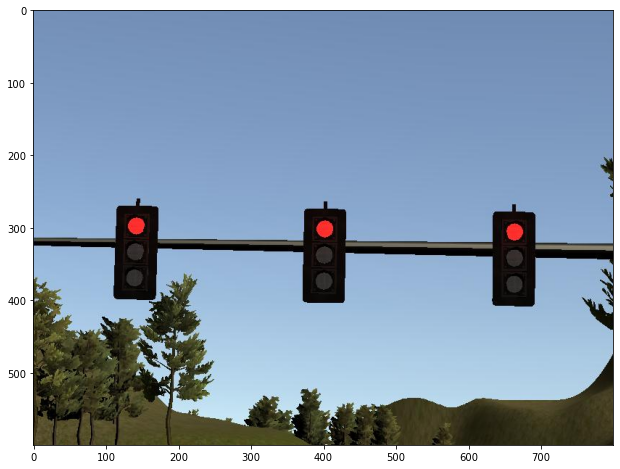

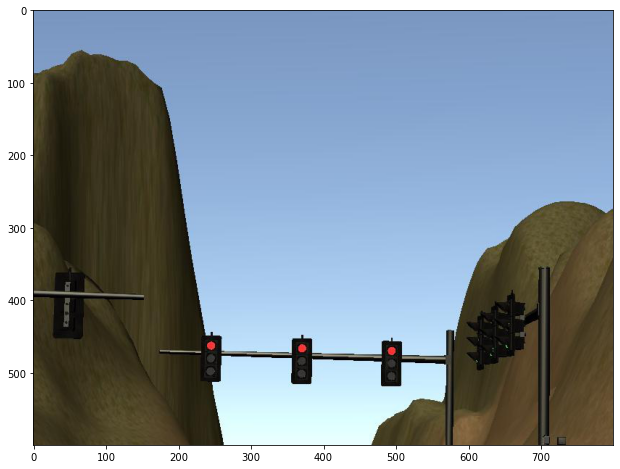

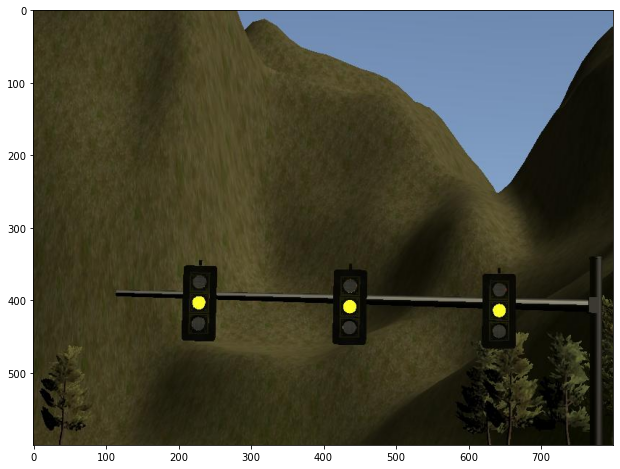

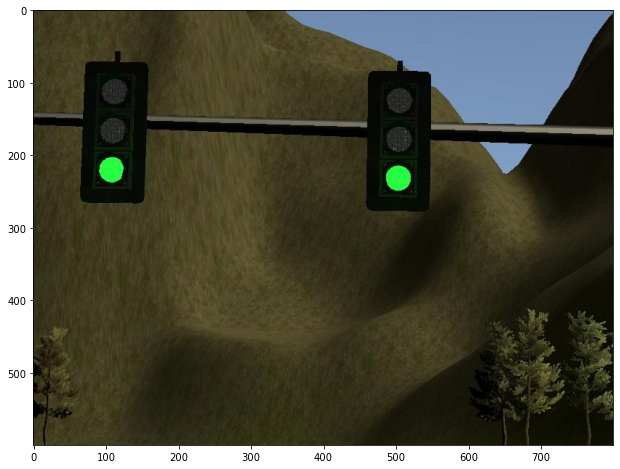

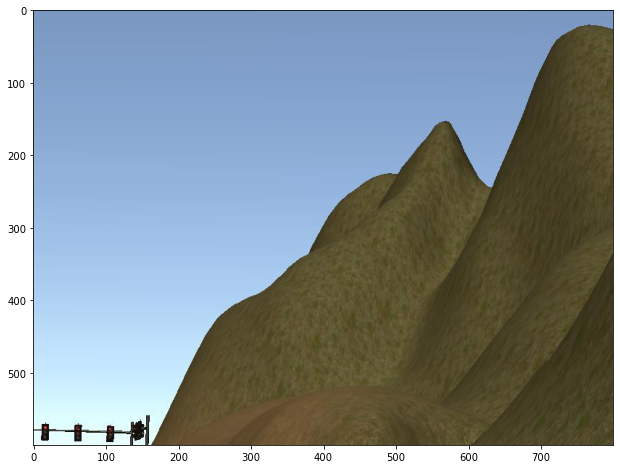

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
# This is required to display the images.
%matplotlib inline 

for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    # Puts image into numpy array to feed into tensorflow graph.
    # Note that by convention we put it into a numpy array with shape
    #   (height, width, channels), where channels=3 for RGB.
    image_np = np.array(Image.open(image_path))

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)

    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=20,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize = (12,8))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

In [ ]:
import shutil
shutil.make_archive('executable', 'zip', '/home/faizan_samad/testing')